In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [38]:
df = pd.read_csv(os.path.join('.', 'data', 'top_qbs_passing_tds.csv'))
df['heightweight'] = df.height / df.weight
df.head()

,min,first_name,last_name,height,weight,years_pro,college,position,passing_tds,heightweight
0,00-0020531,Drew,Brees,72,209,16,Purdue,QB,295,0.344498
1,00-0019596,Tom,Brady,76,225,17,Michigan,QB,279,0.337778
2,00-0023459,Aaron,Rodgers,74,225,12,California,QB,274,0.328889
3,00-0010346,Peyton,Manning,77,230,18,Tennessee,UNK,235,0.334783
4,00-0022942,Philip,Rivers,77,228,13,North Carolina State,QB,217,0.337719


In [39]:
features = ['heightweight', 'years_pro']
x = df.loc[:, features]

In [40]:
y = df.loc[:, 'passing_tds']

In [41]:
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=features)
x.head()

,heightweight,years_pro
0,1.018202,1.463324
1,0.430715,1.689146
2,-0.346404,0.560038
3,0.168860,1.914968
4,0.425603,0.785859


In [42]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-0.314749,1.754704
1,-0.889845,1.498968
2,-0.640951,0.151062
3,-1.234685,1.473489
4,-0.254740,0.856633


In [43]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf.head()

,principal component 1,principal component 2,passing_tds
0,-0.314749,1.754704,295
1,-0.889845,1.498968,279
2,-0.640951,0.151062,274
3,-1.234685,1.473489,235
4,-0.254740,0.856633,217


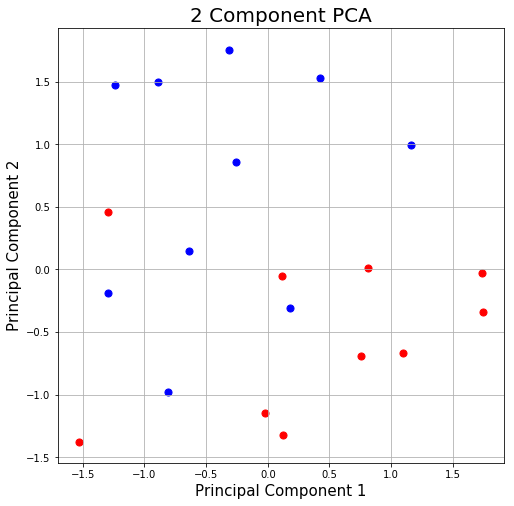

In [44]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


bottom = finalDf.loc[:, 'passing_tds'].quantile(0.2)
top = finalDf.loc[:, 'passing_tds'].quantile(0.8)

bottomDf = finalDf.loc[finalDf.passing_tds <= bottom]
midDf = finalDf.loc[(finalDf.passing_tds > bottom) & (finalDf.passing_tds <= top)]
topDf = finalDf.loc[finalDf.passing_tds > top]

ax.scatter(bottomDf.loc[:, 'principal component 1']
               , bottomDf.loc[:, 'principal component 2']
               , c = 'r'
               , s = 50)
ax.scatter(topDf.loc[:, 'principal component 1']
               , topDf.loc[:, 'principal component 2']
               , c = 'b'
               , s = 50)
ax.grid()